# 1. Introduction 

The quality of a wine is a complex and multifaceted concept that depends on numerous factors, ranging from the vineyard to the winemaking process. Understanding these elements can help you appreciate the nuances and characteristics that make each wine unique. 

Accoring to experts there are 5 key factors that impact wine quality:

* Ripeness Level of Grapes
* Cold Soaking
* Fermentation Temperatures
* Type of Aging Containers
* Capping Method

Sourse: https://grapeworks.com.au/news/winemaking/five-factors-that-affect-wine-quality/


# 2.  The objective of this work: 

* Analyze and identify which variables influence perceived wine quality the most by fitting a statistical model.

* Describe the dataset. Document clearly what each variable in the dataset measures. - Describe how and when the data was collated, what is the sample size, and any other important detail.

* Formulate at least one specific hypothesis (e.g. “fixed acidity of wine has a negative impact on perceived wine quality”). Also state the corresponding null hypothesis.

* Perform EDA. Inspect variables separately, plot how they correlate with the independent variable and one another. Check for multicollinearity.

* Separate a random 20% of your dataset as a hold-out. Select variables and their transformations for your model. Provide arguments for why those variables were chosen and which transformations were applied. 

* Fit the model using statsmodels. Print out the model summary and provide a written interpretation of key model fit statistics (such as R-squared) and coefficients. 

* Explain which variables have the largest impact on the dependent variable, including their confidence intervals. 

* Answer the hypothesis you stated in the beginning of the analysis. Inspect how the model performs on the hold out dataset. 

* Provide suggestions for how your analysis could be improved

# 3.  Importing all modules and dataset info analysis

In [60]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from scipy import stats

In [6]:
path = ('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df = pd.read_csv(path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
missing_values = df.isnull().sum()

In [9]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 240


In [10]:
df_cleaned = df.drop_duplicates()
print("DataFrame after removing duplicates:")
print(df_cleaned)

DataFrame after removing duplicates:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [18]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [12]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [26]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [25]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

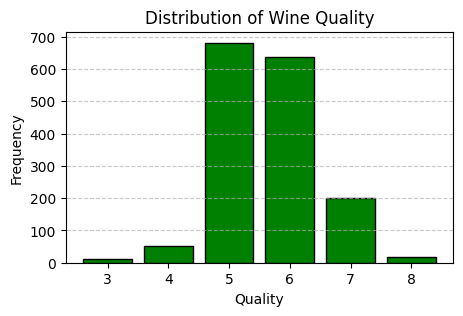

In [15]:
quality_counts = df['quality'].value_counts()

# Convert the series to lists for plotting
qualities = quality_counts.index.tolist()
counts = quality_counts.values.tolist()

# Plot the bar chart
plt.figure(figsize=(5, 3))
plt.bar(qualities, counts, color='green', edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.xticks(qualities)  # Ensure x-ticks match the quality values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Outlires identification

<Axes: xlabel='alcohol'>

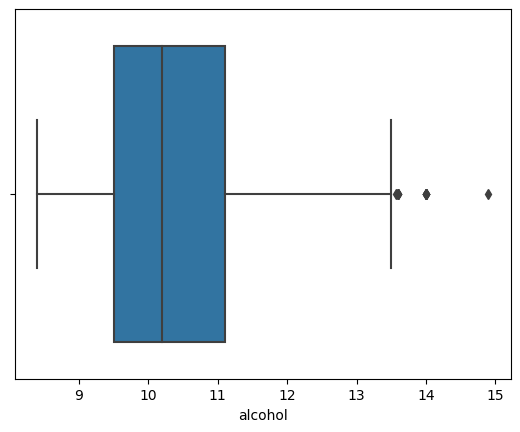

In [56]:
sns.boxplot(x=df['alcohol'])

In [61]:
z_scores = stats.zscore(df[selected_vars])
outliers = (z_scores > 3) | (z_scores < -3)
outliers_df = df[(outliers.any(axis=1))]
print(outliers_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
38              5.7             1.130         0.09             1.5      0.172   
...             ...               ...          ...             ...        ...   
1374            6.8             0.815         0.00             1.2      0.267   
1493            7.7             0.540         0.26             1.9      0.089   
1496            7.7             0.540         0.26             1.9      0.089   
1558            6.9             0.630         0.33             6.7      0.235   
1570            6.4             0.360         0.53             2.2      0.230   

      free sulfur dioxide  


# a) Data summary: 
* Dataset summary: Total entries: 1359 After duplication drop off This is a tiny dataset by ML standard
* There are total 12 columns: 11 features + 1 label 
* Label column: quality 
* Features: [fixed acidity, volitile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol] 
* 240 duplicates values were removed.
* No missing values.
* All Columns are numeric(float type) and quality is only int type.
* No very bad and high quality wines (bellow 3 and above 8).
* 80% of wine has average quality: 5 and 6 
* Quality distrubution might cause a problem while random sampling. The test distribution may not match with the overall distribution.
* Due to reativly small dataset and lack of deep knowledge of wine factors, I decided to keep outliers

# 4. EDA, The independent variables correlation and  multicollinearity. Hipotesis

# a) Variables inspection

In [16]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names = dataset.columns.values
    number_of_columns = len(column_names)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()
    
    for i, column in enumerate(column_names):
        if plot_type == 'hist':
            dataset[column].plot(kind='hist', ax=axes[i], edgecolor='black',
                                 bins=20)
            axes[i].set_title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()


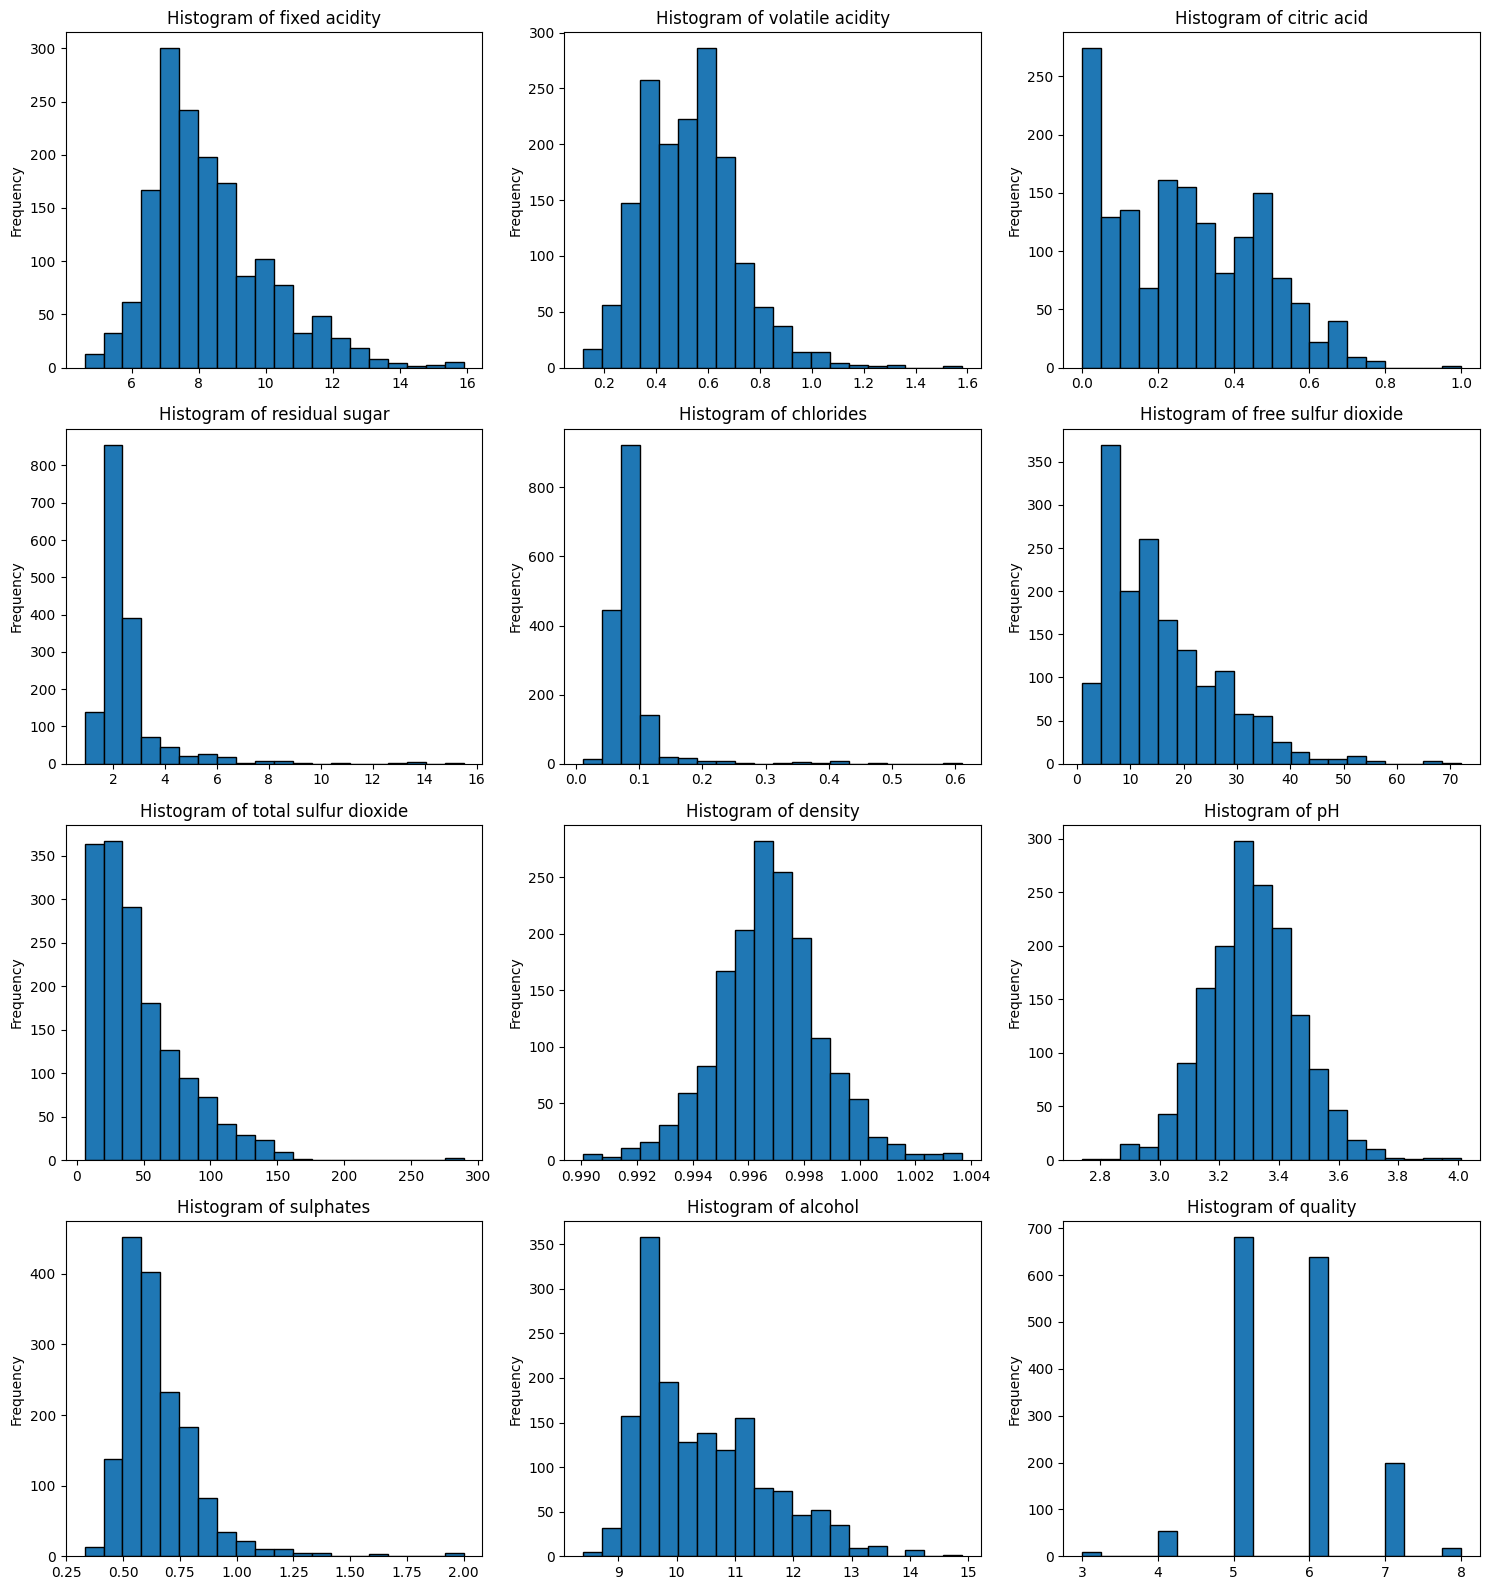

In [17]:
draw_multivarient_plot(df,4,3,"hist")

Features description based on the plots
* Features have different distributions -
* A few are tail heavy. e.g. residual sugar, free so2
* A few are multiple modes. e.g. volitile acidity, citric acid

# b)  Hipotesis  tests

* Hypothesis
Hypothesis (H1): "Alcohol in wine positively affects its perceived quality."


* Null Hypothesis (H0): "Alcohol  in wine does not affect its perceived quality."

The null hypothesis states that there is no relationship between Alcohol  and perceived quality.

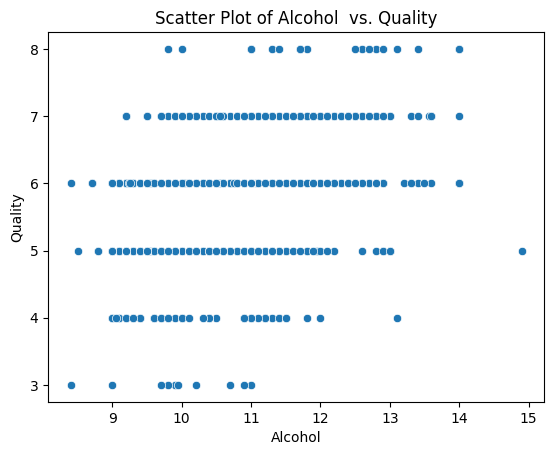

In [18]:
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Scatter Plot of Alcohol  vs. Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

In [19]:
corr, p_value = pearsonr(df['alcohol'], df['quality'])
print(f'Pearson correlation coefficient: {corr}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.47616632400113607
P-value: 2.8314769747761665e-91


Key Findings for hipotesis based on Pearson correlation
* This coefficient of 0.476 indicates a moderate positive correlation between alcohol content and wine quality
* The p-value is extremely small, much smaller than the common significance level of 0.05 This indicates that the correlation between alcohol content and wine quality is highly statistically significant. 

**The null hypothesis that there is no correlation between these two variables in rejected. **


* Further Analysis: Given the moderate correlation, it might be beneficial to explore other variables that could influence wine quality. Multiple regression analysis, as previously conducted, can help identify additional factors and their combined effects.

# Hipotesis 2 tests

* Hypothesis (H2): "Citric acid of wine positively affects its perceived quality."

* Null Hypothesis (H0): "Citric acid of wine does not affect its perceived quality."

This hypothesis suggests that as the Citric acid  in wine increases, the perceived quality of the wine, as measured by its quality rating, also increases. The null hypothesis states that there is no relationship between Citric acid and perceived quality.

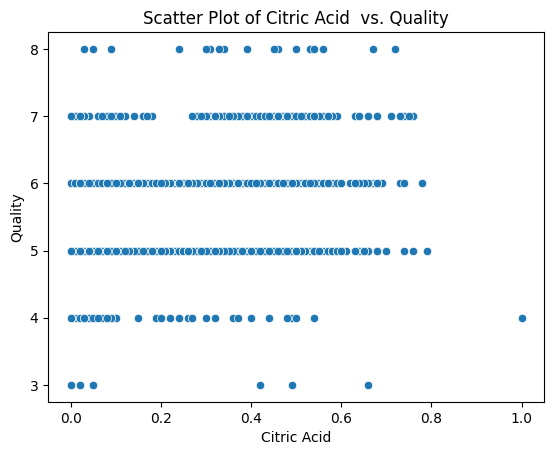

In [20]:
sns.scatterplot(x='citric acid', y='quality', data=df)
plt.title('Scatter Plot of Citric Acid  vs. Quality')
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.show()

In [27]:
corr, p_value = pearsonr(df['citric acid'], df['quality'])
print(f'Pearson correlation coefficient: {corr}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.2263725143180414
P-value: 4.9912952505084995e-20


Key findings:
* A coefficient of 0.226 indicates a weak positive correlation between citric acid and quality.
* In this case, the p-value is extremely small , which strongly suggests that the weak positive correlation between citric acid and quality is statistically significant.

*The null hypothesis that there is no correlation between these two variables in rejected. *

* Practical Use
Even though the correlation is weak, winemakers and analysts can consider citric acid as one of the factors when evaluating wine quality, but they should also consider other variables for a more comprehensive analysis.

 # c) The independent variables correlation and  multicollinearity.

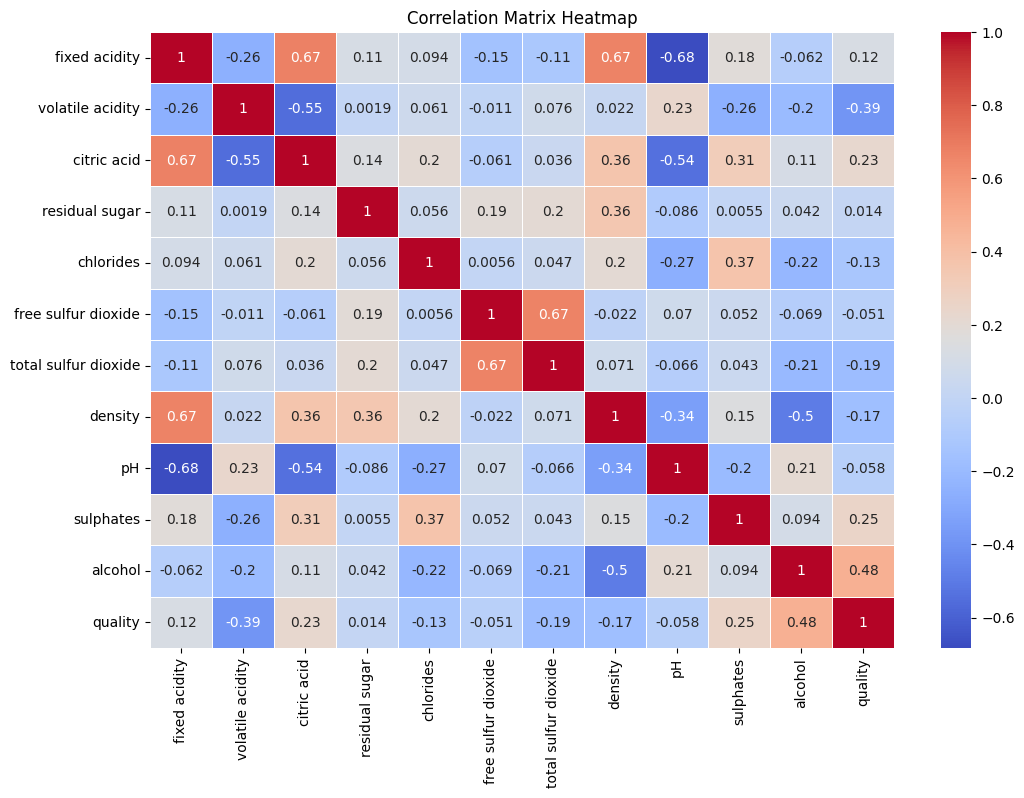

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The highest correlation between is between quality and alcohol ( positive - 0,48) and volatile acidity ( negative - 0,39).

Variables with high correlation coefficients (close to 1 or -1) were found:These pairs may indicate multicollinearity:

Positive between: 
* density and fixed acidity + 0,67 high 
* fixed acidity and citric acid + 0,67 high
* quality and alcohol +  0,48 medium

Negative between:
* PH a Fixed Acidity - 0,68 high
* PH  and Citric Acid - 0,54  high
* Volagile Acid and Citric Acid - 0,55 high


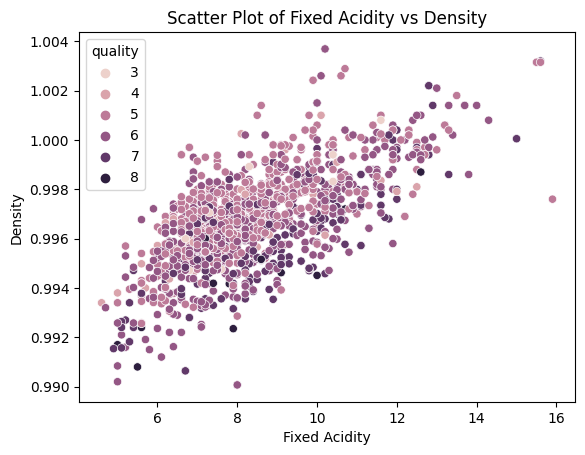

In [76]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=df)

# Set plot title and labels
plt.title('Scatter Plot of Fixed Acidity vs Density')
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')

# Show the plot
plt.show()

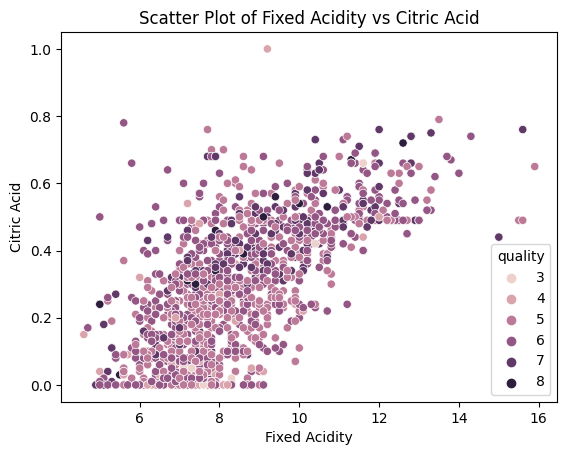

In [78]:
sns.scatterplot(x='fixed acidity', y='citric acid', hue='quality', data=df)
# Set plot title and labels
plt.title('Scatter Plot of Fixed Acidity vs Citric Acid')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
# Show the plot
plt.show()

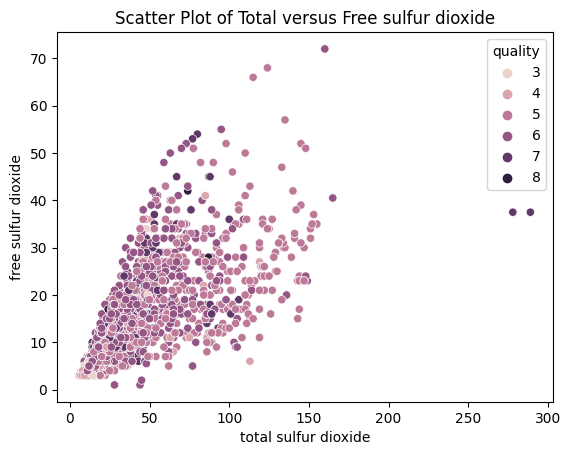

In [79]:
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='quality', data=df)

# Set plot title and labels
plt.title('Scatter Plot of Total versus Free sulfur dioxide')
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')

# Show the plot
plt.show()

# d) Separate a random 20% of your dataset as a hold-out for testing. 

* Fit the model using statsmodels. Print out the model summary and provide a written interpretation of key model fit statistics (such as R-squared) and coefficients. 

Separate a Random 20% of Your Dataset as a Hold-Out for testing purposes.

In [27]:
# Split the data into training and hold-out sets
train_df, holdout_df = train_test_split(df, test_size=0.20, random_state=42)

# Display the size of the training and hold-out sets
print(f"Training set size: {train_df.shape[0]}")
print(f"Hold-out set size: {holdout_df.shape[0]}")

Training set size: 1279
Hold-out set size: 320


Step 2: Select Variables and Their Transformations

Selection of Variables were made based on the following criteria:

* Domain Knowledge: These variables are known to affect wine quality based on chemical composition and previous studies in oenology (the study of wines).

* Correlation with Quality: Preliminary correlation analysis showed that these variables have a relationship with the wine quality score.

* Predictive Power: These variables are often used in wine quality prediction models, indicating their importance in predicting the dependent variable.

So based on correlation with Quality the following vars were selected: alcohol, volatile acidity, chlorides, total sulfur dioxide,
sulphates, citric acidity

In [48]:
selected_vars = ['alcohol', 'volatile acidity', 'chlorides', 'total sulfur dioxide',
'sulphates', 'citric acid', 'fixed acidity']

We will standardize the variables to ensure they are on a comparable scale, which can improve the model's performance and interpretability.


In [49]:

# Standardize the selected variables
scaler = StandardScaler()
train_df[selected_vars] = scaler.fit_transform(train_df[selected_vars])
holdout_df[selected_vars] = scaler.transform(holdout_df[selected_vars])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
scaler = StandardScaler()
train_df[selected_vars] = scaler.fit_transform(train_df[selected_vars])
holdout_df[selected_vars] = scaler.transform(holdout_df[selected_vars])

In [50]:
# Define the predictors and the response variable
X_train = train_df[selected_vars]
Y_train = train_df['quality']

#Step 2: Select Variables and Their Transformations
Selected Variables
Based on previous analysis and domain knowledge, we will select the following variables for the model:

alcohol
volatile acidity
chlorides
total sulfur dioxide
pH
sulphates
Transformations
We will standardize the variables to ensure they are on a comparable scale, which can improve the model's performance and interpretability.


In [51]:
# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)

In [52]:
# Fit the regression model
model = sm.OLS(Y_train, X_train).fit()

In [53]:

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     94.54
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          4.42e-111
Time:                        17:58:07   Log-Likelihood:                -1271.9
No. Observations:                1279   AIC:                             2560.
Df Residuals:                    1271   BIC:                             2601.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6239 





# 1. Key Findings - OLS (Ordinary Least Squares) results:


a) Model Summary
* Dep. Variable: quality
This is the dependent variable we are trying to predict (wine quality).

*  R-squared - 0.342
Indicates that approximately 34.2% of the variance in the dependent variable (quality) can be explained by the model.
This suggests a moderate fit; there is still a significant portion of variance not explained by the model.

* F-statistic: 94.54
Tests the overall significance of the model. A high F-statistic indicates that the model is statistically significant.

* Prob (F-statistic): 4.42e-111
The very low p-value indicates that the model as a whole is highly significant, suggesting that the predictors jointly have a significant effect on the dependent variable.

b) Coefficients and Their Significance

* alcohol: 0.3011
Positive and highly significant (p<0.0001). Each one-unit increase in standardized alcohol content is associated with a 0.3011 unit increase in quality.
* volatile acidity: -0.1955
Negative and highly significant (p<0.0001). Each one-unit increase in standardized volatile acidity is associated with a 0.1955 unit decrease in quality.
* chlorides: -0.0756
Negative and significant (p=0.001). Each one-unit increase in standardized chlorides is associated with a 0.0756 unit decrease in quality.
* total sulfur dioxide: -0.0719
Negative and significant (p<0.0001). Each one-unit increase in standardized total sulfur dioxide is associated with a 0.0719 unit decrease in quality.
* sulphates: 0.1466
Positive and highly significant (p<0.0001). Each one-unit increase in standardized sulphates is associated with a 0.1466 unit increase in quality.
* citric acid: -0.0359
Negative but not significant (p=0.264). This suggests that citric acid does not have a statistically significant impact on quality in this model.
* fixed acidity: 0.0664
Positive and significant (p=0.013). Each one-unit increase in standardized fixed acidity is associated with a 0.0664 unit increase in quality.

c) Hypothesis Testing: 

* Hipotesis 1 
The hypothesis that higher alcohol content positively affects perceived wine quality is supported by the significant positive coefficient for alcohol.

* Hipotesis 2 
Is Citric Acid Correlated or Not?
Pearson Correlation - There is a weak but statistically significant positive correlation between citric acid and quality.

OLS Regression: - When controlling for other variables, citric acid is not a significant predictor of quality.

* Summary and Implications for Hipotesis 2
Correlation: Citric acid shows a weak positive correlation with quality when considered alone.
Regression: Citric acid does not significantly affect quality when other variables are included in the model. This suggests that its effect is not substantial after accounting for other factors.



d) Practical Use: 

* The significant predictors (both positive and negative) can be used to guide wine production processes to improve quality.

* By interpreting these results, one can gain insights into the factors that significantly influence wine quality and their relative importance, helping you make informed decisions in wine production and quality control.


e) Suggestions for Improvement:

* Add for analysis additional factors which influence wine quality such as:
Ripeness Level of Grapes, Cold Soaking, Fermentation Temperatures, Type of Aging Containers or Capping Method to increase of R-squared

* Create new features based on domain knowledge or interactions between existing features.

* Check if quality (customers taste change within time) -compare resulats from previours years (if data available)

* Provide analysis on better quality data set (containing all quality numbers from 1 to 10)

* Experiment with different regression models 

* Remove or replace outliers with a more typical value, such as the mean or median of the data.
